In [1]:
# importing basic modules for data cleaning and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print('(Rows, Columns): ' + str(df.shape))

(Rows, Columns): (1599, 12)


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.isnull().sum()
# pretty straightforward dataset that does not require further cleaning

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

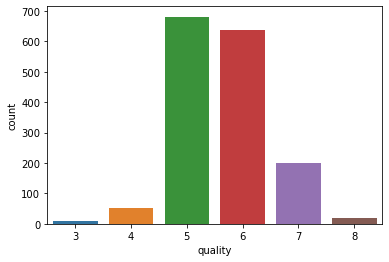

In [7]:
# quick plot to see the distribution of quality
sns.countplot(data=df,x='quality')

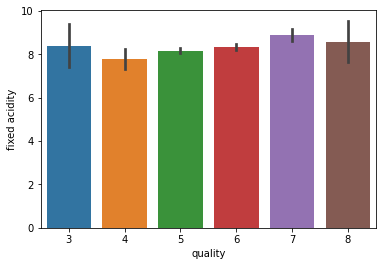

In [8]:
# seems like there is not a strong relationship between fixed acidity and quality
sns.barplot(data=df,x='quality',y='fixed acidity')

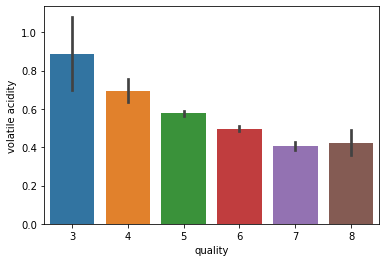

In [9]:
# seems like as volatile acidity level decreases, quality increases
sns.barplot(data=df,x='quality',y='volatile acidity')

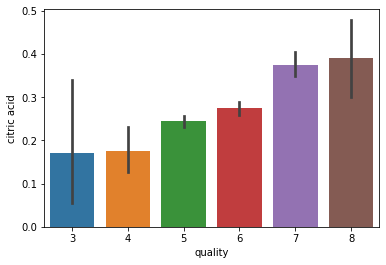

In [10]:
# seems like as citric acid increases, quality increases
sns.barplot(data=df,x='quality',y='citric acid')

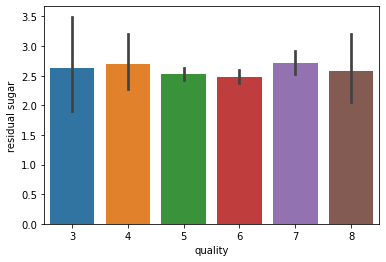

In [11]:
# residual sugar does not seem to impact quality by much
sns.barplot(data=df,x='quality',y='residual sugar')

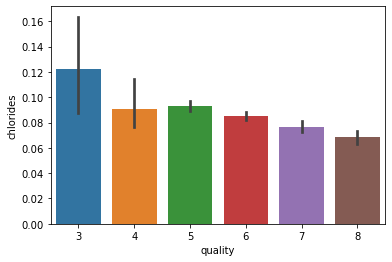

In [12]:
# seems like as chlorides level decreases, quality increases
sns.barplot(data=df,x='quality',y='chlorides')

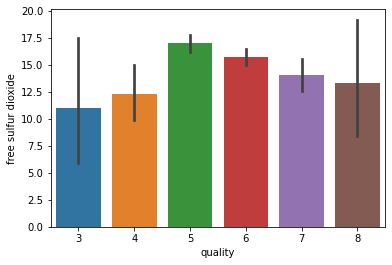

In [13]:
# no clear relationship between free sulfur dioxide and quality can be observed
sns.barplot(data=df,x='quality',y='free sulfur dioxide')

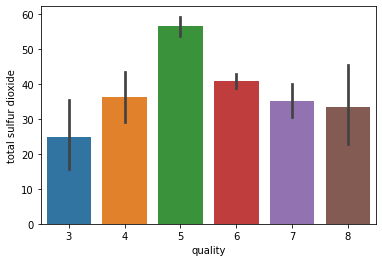

In [14]:
# no clear relationship between total sulfur dioxide and quality can be observed
sns.barplot(data=df,x='quality',y='total sulfur dioxide')

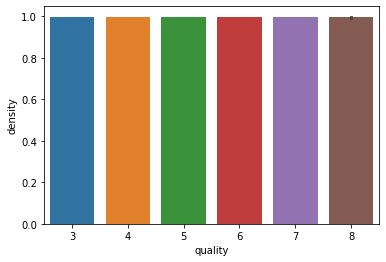

In [15]:
# seems like all wine records in the database has similar density level 
sns.barplot(data=df,x='quality',y='density')

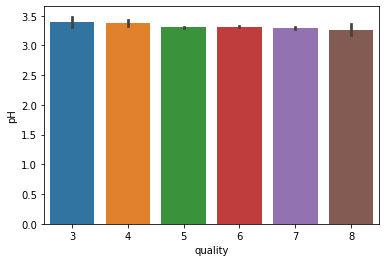

In [16]:
# seems like all wine records in the database has similar density level
sns.barplot(data=df,x='quality',y='pH')

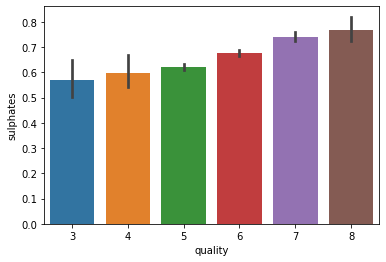

In [17]:
# seems like as sulphates level increases, quality increases
sns.barplot(data=df,x='quality',y='sulphates')

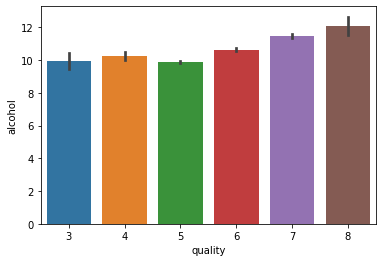

In [18]:
# seems like as alcohol percentage increases, quality increases
sns.barplot(data=df,x='quality',y='alcohol')

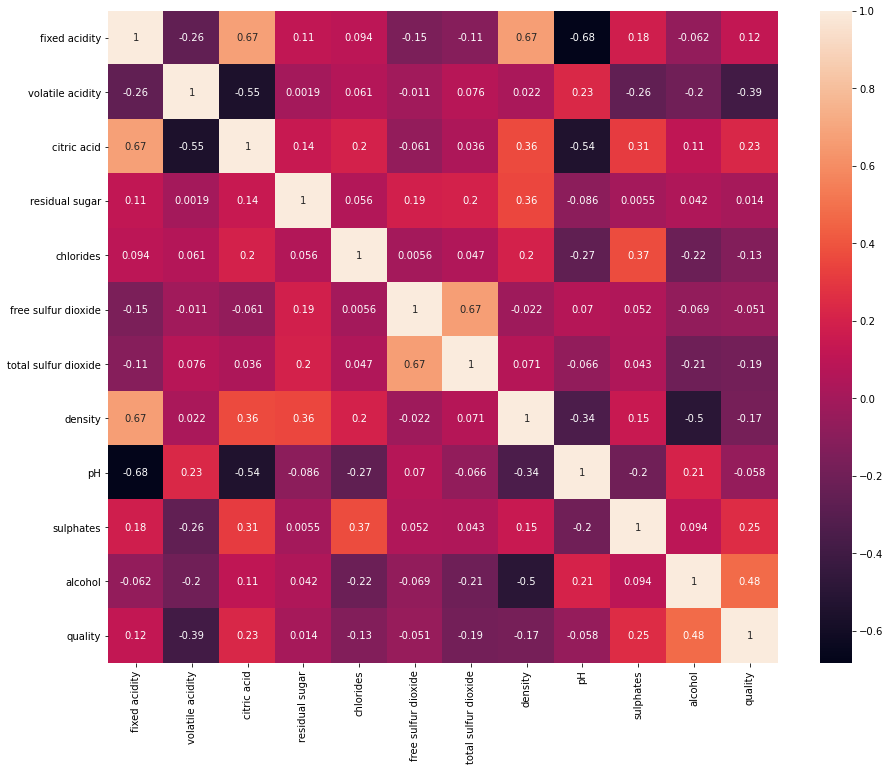

In [19]:
# quick correlation plot to reaffirm previous assumptions
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True)

In [20]:
# Change quality of wine into a binary variable for preparation of classification
df['good'] = [1 if q >= 7 else 0 for q in df['quality']]

In [21]:
df['good'].value_counts()
# There seem to be a bit of imbalance which is expected since good wines tend to be rare

0    1382
1     217
Name: good, dtype: int64

In [22]:
# Separate feature and target variables

X = df.drop(['good','quality'], axis=1)
y = df['good']

In [79]:
# split the data into train/test and standardize X since featue variables have different scales

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=7)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression

logi = LogisticRegression(random_state=7)
logi.fit(X_train, y_train)
logi_pred = logi.predict(X_test)

print(classification_report(y_test, logi_pred))
print(roc_auc_score(y_test, logi_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       349
           1       0.52      0.43      0.47        51

    accuracy                           0.88       400
   macro avg       0.72      0.69      0.70       400
weighted avg       0.87      0.88      0.87       400



In [25]:
# Model 2: Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=7)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

print(classification_report(y_test, tree_pred))
print(roc_auc_score(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       349
           1       0.38      0.53      0.44        51

    accuracy                           0.83       400
   macro avg       0.65      0.70      0.67       400
weighted avg       0.86      0.83      0.84       400



In [26]:
# Model 3: Support Vector Classifier

from sklearn.svm import SVC

svc = SVC(random_state=7)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(classification_report(y_test, svc_pred))
print(roc_auc_score(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       349
           1       0.57      0.33      0.42        51

    accuracy                           0.88       400
   macro avg       0.74      0.65      0.68       400
weighted avg       0.86      0.88      0.87       400



In [27]:
# Model 3 - Parameter Tuning

param_svc = {
    'C': [0.7,0.8,0.9,1,1.1,1.2,1.3],
    'gamma': [0.7,0.8,0.9,1,1.1,1.2,1.3]
}
grid_svc = GridSearchCV(svc, param_grid=param_svc, scoring='roc_auc',cv=10,n_jobs=-1,verbose=1)

In [28]:
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 475 out of 490 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:    3.0s finished


{'C': 1.1, 'gamma': 1.3}

In [29]:
# Model 3 Tuned

svc2 = SVC(C=1.1, gamma=1.3, random_state=7)
svc2.fit(X_train, y_train)
svc2_pred = svc2.predict(X_test)

print(classification_report(y_test, svc2_pred))
print(roc_auc_score(y_test, svc2_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       349
           1       0.89      0.33      0.49        51

    accuracy                           0.91       400
   macro avg       0.90      0.66      0.72       400
weighted avg       0.91      0.91      0.89       400

0.91


In [30]:
# Model 4: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=7)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

print(classification_report(y_test, forest_pred))
print(roc_auc_score(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       349
           1       0.61      0.53      0.57        51

    accuracy                           0.90       400
   macro avg       0.77      0.74      0.76       400
weighted avg       0.89      0.90      0.89       400

0.8975


In [31]:
# Model 4 - Parameter Tuning

param_rf = {
    'n_estimators': [100,250,500,750],
    'max_depth': [3,5,7,10,15],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split':[2,5,10],
    'bootstrap': [True, False]
}
grid_rf = GridSearchCV(forest, param_grid=param_rf, scoring='roc_auc',cv=10,n_jobs=-1,verbose=1)

In [32]:
grid_rf.fit(X_train,y_train)
grid_rf.best_params_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 1274 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2474 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3224 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 4074 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5024 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 6074 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  9.7min finished


{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 750}

In [33]:
# Model 4 Tuned

forest2 = RandomForestClassifier(random_state=7,
                                bootstrap=True,
                                max_depth=15,
                                min_samples_leaf=1,
                                min_samples_split=2,
                                n_estimators=750)
forest2.fit(X_train, y_train)
forest2_pred = forest2.predict(X_test)

print(classification_report(y_test, forest2_pred))
print(roc_auc_score(y_test, forest2_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       349
           1       0.58      0.51      0.54        51

    accuracy                           0.89       400
   macro avg       0.75      0.73      0.74       400
weighted avg       0.88      0.89      0.89       400

0.89


In [34]:
# Model 5: AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=7)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

print(classification_report(y_test, ada_pred))
print(roc_auc_score(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       349
           1       0.45      0.41      0.43        51

    accuracy                           0.86       400
   macro avg       0.68      0.67      0.67       400
weighted avg       0.86      0.86      0.86       400

0.86


In [35]:
# Model 5 - Parameter Tuning

param_ada = {
    'n_estimators': [10,50,100,250,500,1000],
    'learning_rate': [0.001,0.01,0.05,0.1,0.15,0.2,0.5],
}
grid_ada = GridSearchCV(ada, param_grid=param_ada, scoring='roc_auc',cv=10,verbose=1,n_jobs=-1)

In [36]:
grid_ada.fit(X_train,y_train)
grid_ada.best_params_

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:   29.8s finished


{'learning_rate': 0.05, 'n_estimators': 1000}

In [37]:
# Model 5 Tuned

ada2 = AdaBoostClassifier(random_state=7, learning_rate=0.05, n_estimators=1000)
ada2.fit(X_train, y_train)
ada2_pred = ada2.predict(X_test)

print(classification_report(y_test, ada2_pred))
print(roc_auc_score(y_test, ada2_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       349
           1       0.49      0.37      0.42        51

    accuracy                           0.87       400
   macro avg       0.70      0.66      0.67       400
weighted avg       0.86      0.87      0.86       400

0.87


In [86]:
# Model 6: XGBoost Classifier

import xgboost as xgb

xgboo = xgb.XGBClassifier(random_state=7,tree_method='gpu_hist')
xgboo.fit(X_train, y_train)
xgboo_pred = xgboo.predict(X_test)

print(classification_report(y_test, xgboo_pred))
print(roc_auc_score(y_test, xgboo_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       349
           1       0.55      0.65      0.59        51

    accuracy                           0.89       400
   macro avg       0.75      0.78      0.76       400
weighted avg       0.90      0.89      0.89       400

0.7848474633406372


In [87]:
# Model 6 - Parameter Tuning

param_xgb = {
    'learning_rate': [0.001,0.01,0.05,0.1,0.15,0.2],
    'n_estimators': [100,250,500,750],
    'max_depth': [2,4,6,8],
    'subsample': [0.8,0.9,1],
    'colsample_bytree':[0.8,0.9,1],
    'gamma':[0,0.1,0.5,1],
    'tree_method':['gpu_hist']
}
rs_xgb = RandomizedSearchCV(xgboo, param_distributions=param_xgb, scoring='roc_auc',cv=3,n_jobs=-1,verbose=1)

In [88]:
rs_xgb.fit(X_train,y_train)
rs_xgb.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   20.4s finished


{'tree_method': 'gpu_hist',
 'subsample': 0.8,
 'n_estimators': 250,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 1,
 'colsample_bytree': 0.8}

In [120]:
# Model 6 Tuned
xgboo2 = xgb.XGBClassifier(random_state=7,
                          colsample_bytree=0.9,
                          gamma=1,
                          learning_rate=0.1,
                          max_depth=8,
                          n_estimators=500,
                          subsample=0.8,
                          tree_method='gpu_hist'
                          )
xgboo2.fit(X_train, y_train)
xgboo2_pred = xgboo2.predict(X_test)

print(classification_report(y_test, xgboo2_pred))
print(roc_auc_score(y_test, xgboo2_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       349
           1       0.61      0.65      0.63        51

    accuracy                           0.90       400
   macro avg       0.78      0.79      0.79       400
weighted avg       0.91      0.90      0.90       400

0.7934434518793191


In [80]:
# Model 7: LightGBM Classifier

import lightgbm as lgb

lgbc = lgb.LGBMClassifier(random_state=7)
lgbc.fit(X_train, y_train)
lgbc_pred = lgbc.predict(X_test)

print(classification_report(y_test, lgbc_pred))
print(roc_auc_score(y_test, lgbc_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       349
           1       0.60      0.63      0.62        51

    accuracy                           0.90       400
   macro avg       0.77      0.78      0.78       400
weighted avg       0.90      0.90      0.90       400

0.7836395303106917


In [77]:
# Model 7 - Parameter Tuning

param_lgbc = {
    'num_leaves': [16,32,48,64,92],
    'max_depth': [-1,5,7,9,11,13],
    'learning_rate': [0.01,0.03,0.05,0.07,0.09,0.1,0.2],
    'n_estimators': [100,250,500,750,1000],
    'boosting': ['dart','rf','gbdt'],
    'max_bin': [15,63,255]
}
grid_lgbc = GridSearchCV(lgbc, param_grid=param_lgbc, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

In [78]:
grid_lgbc.fit(X_train, y_train)
grid_lgbc.best_params_

Fitting 5 folds for each of 9450 candidates, totalling 47250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 21.8min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart


{'boosting': 'dart',
 'learning_rate': 0.2,
 'max_bin': 255,
 'max_depth': 9,
 'n_estimators': 250,
 'num_leaves': 32}

In [83]:
# Model 7 Tuned

lgbc2 = lgb.LGBMClassifier(random_state=7,
                          learning_rate=0.2,
                          max_depth=9,
                          n_estimators=250,
                          num_leaves=32,
                          boosting='dart',
                          max_bin=255
                          )
lgbc2.fit(X_train, y_train)
lgbc2_pred = lgbc2.predict(X_test)

print(classification_report(y_test, lgbc2_pred))
print(roc_auc_score(y_test, lgbc2_pred))

[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       349
           1       0.62      0.63      0.62        51

    accuracy                           0.90       400
   macro avg       0.78      0.79      0.78       400
weighted avg       0.90      0.90      0.90       400

0.7850721950671385
